In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
!pip install plotly

In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [23]:
df = pd.read_csv("/home/madhuri/Downloads/Groceries_dataset.csv")

In [24]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [25]:
df.isnull().any()

Member_number      False
Date               False
itemDescription    False
dtype: bool

In [26]:
all_products = df['itemDescription'].unique()

In [27]:
print("Total products {}".format(len(all_products)))

Total products 167


In [28]:
def distribution_plot(x,y,name=None,xaxis=None,yaxis=None):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(
        title_text=name,
        xaxis_title=xaxis,
        yaxis_title=yaxis
    )
    fig.show()

In [29]:
x = df['itemDescription'].value_counts()

In [30]:
x = x.sort_values(ascending = False)
x = x[0:10]
x

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

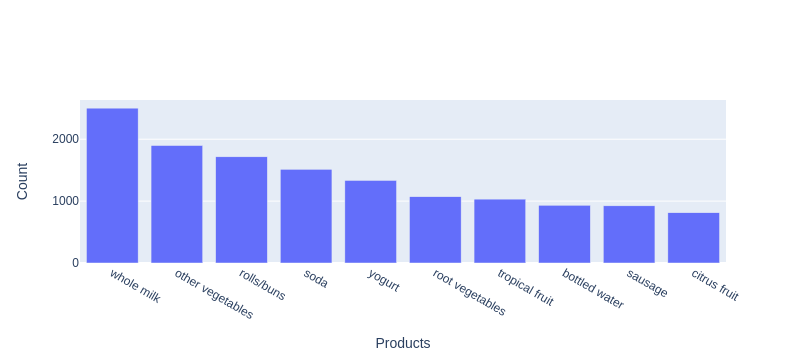

In [31]:
distribution_plot(x=x.index, y= x.values,yaxis='Count',xaxis="Products")

one-hot replresentation of purchasedd product


In [32]:
one_hot = pd.get_dummies(df['itemDescription'])

In [33]:
one_hot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df.drop('itemDescription',inplace=True,axis=1)

In [35]:
df

,Member_number,Date
0,1808,21-07-2015
1,2552,05-01-2015
2,2300,19-09-2015
3,1187,12-12-2015
4,3037,01-02-2015
...,...,...
38760,4471,08-10-2014
38761,2022,23-02-2014
38762,1097,16-04-2014
38763,1510,03-12-2014


In [36]:
df=df.join(one_hot)

In [37]:
df.head()

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2552,05-01-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2300,19-09-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1187,12-12-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3037,01-02-2015,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Transactions: If a customer bought multiple product on same day. we will consider it one transaction

In [ ]:
records = df.groupby(["Member_number","Date"])[all_products[:]].apply(sum)

In [ ]:
records = records.reset_index()[all_products]

In [ ]:
## Replacing non-zero values with product names
def get_Pnames(x):
    for product in all_products:
        if x[product] > 0:
            x[product] = product
    return x

records = records.apply(get_Pnames, axis=1)
records.head()

In [41]:
records.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
print("Total Transactions: {}".format(len(records)))

Total Transactions: 14963


In [43]:
## Removing zeros
x= records.values
x= [sub[~(sub == 0)].tolist() for sub in x if sub[sub!=0].tolist()]

transactions = x

In [44]:
transactions[0:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [45]:
transactions[0:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [46]:
!pip install --upgrade apriori

In [53]:
#rules = apriori(transactions,min_support=0.00030,min_lift=3,min_lenth=2,target ="rules")
rules = apriori(records, min_support=0.5,use_columns = )

AttributeError: 'list' object has no attribute 'size'

In [ ]:
rules.head()